<a href="https://colab.research.google.com/github/Qoolin/Om/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%B7%D0%BD%D0%B0%D1%87%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from  sklearn import  datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [ ]:
model_svm = svm.SVC(probability = True, kernel = 'linear')
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 2, 1, 0, 2])

In [ ]:
model_svm.predict_proba(X_test)

array([[1.58134555e-02, 9.71495664e-01, 1.26908808e-02],
       [9.39305888e-01, 4.12382360e-02, 1.94558756e-02],
       [9.60650041e-01, 2.55977316e-02, 1.37522272e-02],
       [9.41714441e-01, 3.86962919e-02, 1.95892666e-02],
       [9.46914073e-01, 3.55793910e-02, 1.75065360e-02],
       [1.19616984e-02, 9.01804989e-01, 8.62333128e-02],
       [9.14481210e-01, 6.16268858e-02, 2.38919043e-02],
       [8.48683018e-03, 9.21070652e-01, 7.04425175e-02],
       [9.16224727e-03, 6.58158915e-02, 9.25021861e-01],
       [9.16741485e-01, 5.88385486e-02, 2.44199666e-02],
       [1.06039730e-02, 1.57944597e-02, 9.73601567e-01],
       [1.29413023e-02, 9.05398533e-01, 8.16601647e-02],
       [5.45158677e-02, 9.30894244e-01, 1.45898885e-02],
       [9.48203087e-01, 3.49438997e-02, 1.68530134e-02],
       [2.24313106e-02, 9.60563990e-01, 1.70046995e-02],
       [6.37203908e-03, 6.72923887e-02, 9.26335572e-01],
       [1.09678936e-02, 1.84568525e-01, 8.04463582e-01],
       [1.99670347e-02, 9.64782

In [ ]:
svm_predictions = model_svm.predict_proba(X_test)
svm_prob_l = []
for i, j in zip(svm_predictions, y_test):
  svm_prob_l.append(i[j])

In [ ]:
len(svm_prob_l)

75

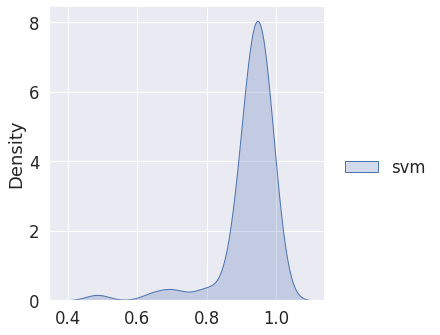

In [ ]:
sns.displot(x = svm_prob_l, hue = ['svm'] * len(svm_prob_l), kind = "kde", fill = True)

In [ ]:
model_tree = RandomForestClassifier(max_depth = 3)
model_tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
tree_predictions = model_tree.predict_proba(X_test)
tree_prob_l = []
for i, j in zip(tree_predictions, y_test):
  tree_prob_l.append(i[j])

In [ ]:
!pip install catboost
from catboost import Pool, CatBoostClassifier

In [ ]:
model_catboost = CatBoostClassifier(verbose = False)
model_catboost.fit(X_train, y_train)

In [ ]:
catboost_predictions = model_catboost.predict_proba(X_test)
catboost_prob_l = []
for i, j in zip(catboost_predictions, y_test):
  catboost_prob_l.append(i[j])

In [ ]:
prob_all = svm_prob_l + tree_prob_l + catboost_prob_l
n = len(svm_prob_l)
name_all = ['svm'] * n + ['tree'] * n + ['catboost'] * n

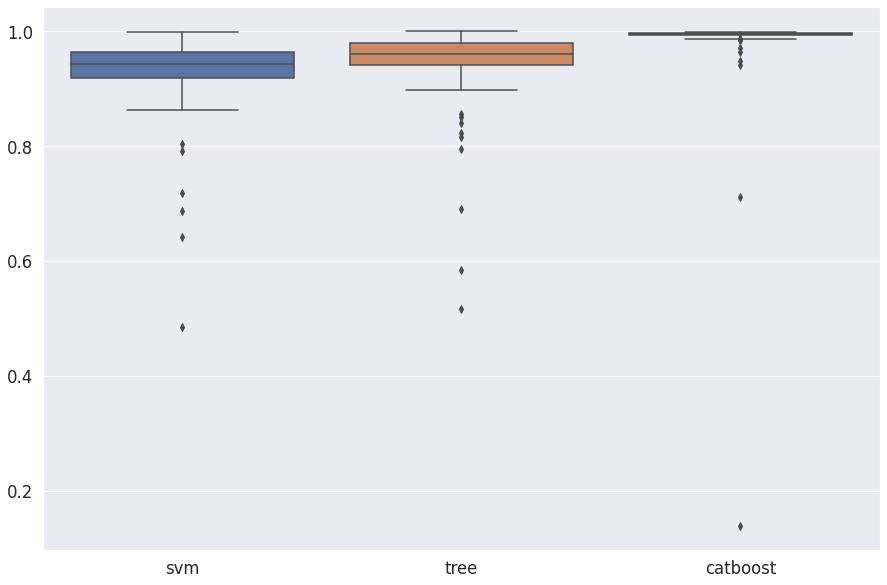

In [ ]:
sns.set_theme(style = "whitegrid")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x = name_all, y = prob_all)

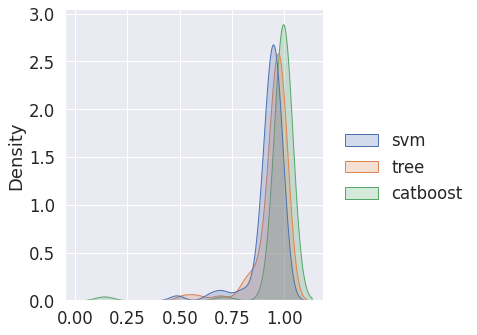

In [ ]:
sns.displot(x = prob_all, hue = name_all, kind = "kde", fill = True)

In [ ]:
from scipy import stats

In [ ]:
stats.wilcoxon(svm_prob_l, tree_prob_l, alternative = 'less').pvalue

0.0005013164347126709

In [ ]:
stats.wilcoxon(tree_prob_l, catboost_prob_l, alternative = 'less').pvalue

1.3008399945368258e-10

In [ ]:
stats.wilcoxon(svm_prob_l, catboost_prob_l, alternative = 'less').pvalue

6.87695118455979e-13

In [ ]:
0.05 / 3 # у всех сравнений p-value меньше чем 0.016(6), значит результаты статистически значимы svm < tree < catboost

0.016666666666666666

In [ ]:
stats.mannwhitneyu(svm_prob_l, tree_prob_l, alternative = 'less').pvalue

0.0004072068560401364

In [ ]:
stats.mannwhitneyu(tree_prob_l, catboost_prob_l, alternative = 'less').pvalue

3.6339604598654355e-07

In [ ]:
stats.mannwhitneyu(svm_prob_l, catboost_prob_l, alternative = 'less').pvalue

1.160138753588269e-20